In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping

2024-05-13 10:26:13.268278: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare the data

In [2]:
# Replace following paths with your data directories
cats_dir = '/Users/martinmurzenkov/Programming/portfolio/data/PetImages/Cat'
dogs_dir = '/Users/martinmurzenkov/Programming/portfolio/data/PetImages/Dog'
target_size = (100, 100)
x, y = [], []
unprocessed_images = []

for label, direction in ((0, cats_dir), (1, dogs_dir)):
    image_paths = os.listdir(direction)
    for image_path in tqdm(image_paths):
        full_image_path = os.path.join(direction, image_path)
        # Some of jpg are damaged
        try:
            x.append(img_to_array(load_img(
                full_image_path,
                target_size=target_size
            )))
            y.append(label)
        except:
            unprocessed_images.append(full_image_path)
        
x = np.array(x)
y = np.array(y)

print(f'{len(unprocessed_images)} images where not processed:')
for unprocessed_image_path in unprocessed_images:
    print(unprocessed_image_path)


  0%|          | 0/12501 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 12501/12501 [00:32<00:00, 385.23it/s]


4 images where not processed:
/Users/martinmurzenkov/Programming/portfolio/data/PetImages/Cat/Thumbs.db
/Users/martinmurzenkov/Programming/portfolio/data/PetImages/Cat/666.jpg
/Users/martinmurzenkov/Programming/portfolio/data/PetImages/Dog/Thumbs.db
/Users/martinmurzenkov/Programming/portfolio/data/PetImages/Dog/11702.jpg


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

## Create and train the model

In [4]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(x=x_train,
          y=y_train,
          epochs=30,
          validation_split=0.01,
          verbose=2,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])

Epoch 1/30
619/619 - 147s - loss: 0.7304 - accuracy: 0.5536 - val_loss: 0.6406 - val_accuracy: 0.5950 - 147s/epoch - 237ms/step
Epoch 2/30
619/619 - 137s - loss: 0.6099 - accuracy: 0.6461 - val_loss: 0.5507 - val_accuracy: 0.7050 - 137s/epoch - 221ms/step
Epoch 3/30
619/619 - 139s - loss: 0.5651 - accuracy: 0.6862 - val_loss: 0.5558 - val_accuracy: 0.7450 - 139s/epoch - 224ms/step
Epoch 4/30
619/619 - 140s - loss: 0.5270 - accuracy: 0.7093 - val_loss: 0.5152 - val_accuracy: 0.7100 - 140s/epoch - 226ms/step
Epoch 5/30
619/619 - 141s - loss: 0.4732 - accuracy: 0.7388 - val_loss: 0.5793 - val_accuracy: 0.7350 - 141s/epoch - 228ms/step
Epoch 6/30
619/619 - 143s - loss: 0.4232 - accuracy: 0.7985 - val_loss: 0.3908 - val_accuracy: 0.8350 - 143s/epoch - 232ms/step
Epoch 7/30
619/619 - 145s - loss: 0.3838 - accuracy: 0.8181 - val_loss: 0.3450 - val_accuracy: 0.8650 - 145s/epoch - 234ms/step
Epoch 8/30
619/619 - 147s - loss: 0.3428 - accuracy: 0.8505 - val_loss: 0.3118 - val_accuracy: 0.8750 - 

## Evaluation

In [7]:
print('Accuracy on the training data:')
print(model.evaluate(x_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(x_test, y_test)[1])

Accuracy on the training data:
625/625 [==============================] - 29s 46ms/step - loss: 0.1908 - accuracy: 0.9139
0.9139413833618164

Accuracy on the test data:
157/157 [==============================] - 7s 44ms/step - loss: 0.3775 - accuracy: 0.8658
0.8658000230789185


### Plotting performance during the training

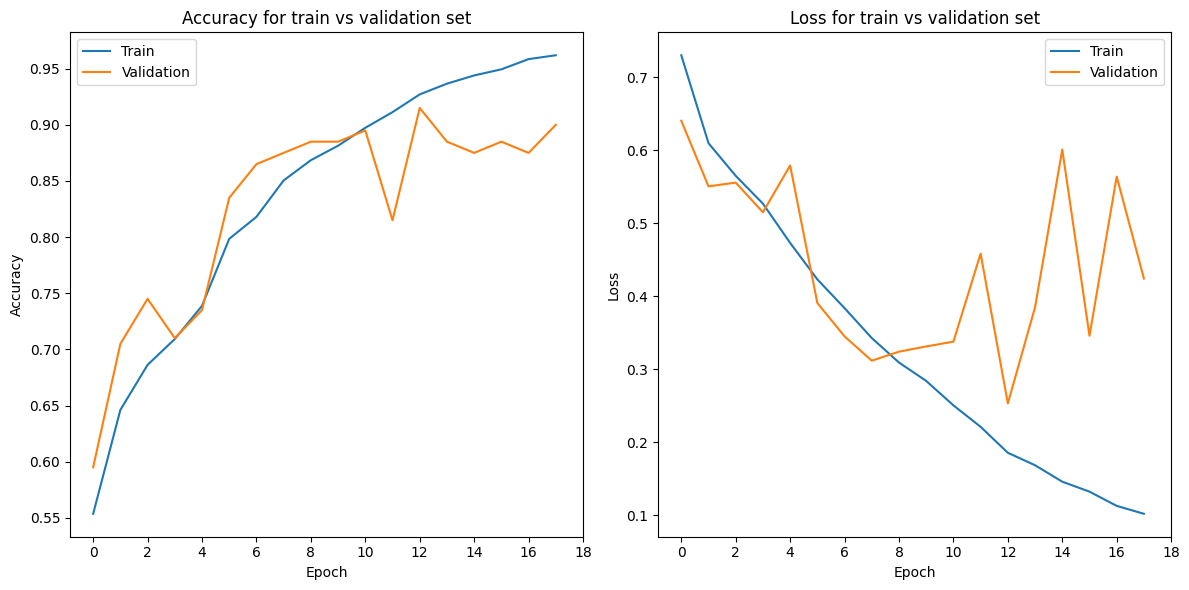

In [12]:
figure, (accuracy_plot, loss_plot) = plt.subplots(1, 2)
figure.set_size_inches(12, 6)

accuracy_plot.plot(history.history['accuracy'])
accuracy_plot.plot(history.history['val_accuracy'])
accuracy_plot.set_title('Accuracy for train vs validation set')
accuracy_plot.set_xlabel('Epoch')
accuracy_plot.set_xticks([i for i in range(0, 19, 2)])
accuracy_plot.set_ylabel('Accuracy')
accuracy_plot.legend(['Train', 'Validation'])

loss_plot.plot(history.history['loss'])
loss_plot.plot(history.history['val_loss'])
loss_plot.set_title('Loss for train vs validation set')
loss_plot.set_xlabel('Epoch')
loss_plot.set_xticks([i for i in range(0, 19, 2)])
loss_plot.set_ylabel('Loss')
loss_plot.legend(['Train', 'Validation'])

figure.tight_layout()
plt.show()

### Display wrong and right decisions

In [13]:
predictions = model.predict(x_test)

157/157 [==============================] - 8s 47ms/step


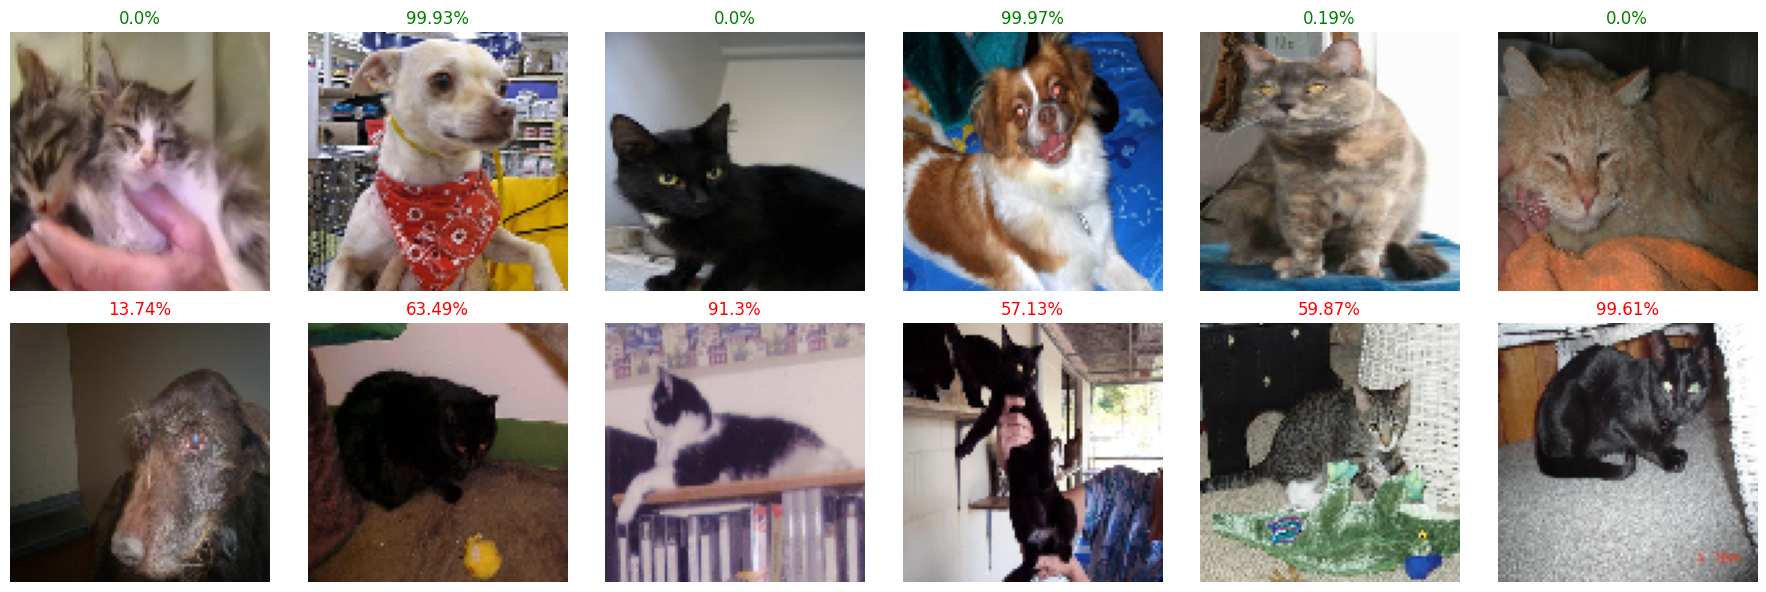

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 6))
cor, incor = 0, 0 
i = 0
while cor < 6 or incor < 6:
    if cor < 6:
        if round(predictions[i][0]) == y_test[i]:
            axes[0][cor].imshow(x_test[i].astype(np.uint8))
            axes[0][cor].set_title(str(round(predictions[i][0] * 100, 2)) + '%', color='green')
            axes[0][cor].axis('off') 
            cor += 1
    if incor < 6:
        if round(predictions[i][0]) != y_test[i]:
            axes[1][incor].imshow(x_test[i].astype(np.uint8))
            axes[1][incor].set_title(str(round(predictions[i][0] * 100, 2)) + '%', color='red')
            axes[1][incor].axis('off') 
            incor += 1
    i += 1

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
plt.show()

### Test on images form the internet

In [45]:
from PIL import Image

test_image_path = '/Users/martinmurzenkov/Downloads/German-Shepherd-dog-Alsatian.jpg.webp'
test_image = np.expand_dims(np.array(Image.open('/Users/martinmurzenkov/Downloads/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg').resize((100, 100))), axis=0)
model.predict(test_image)

1/1 [==============================] - 0s 29ms/step


array([[0.9999993]], dtype=float32)

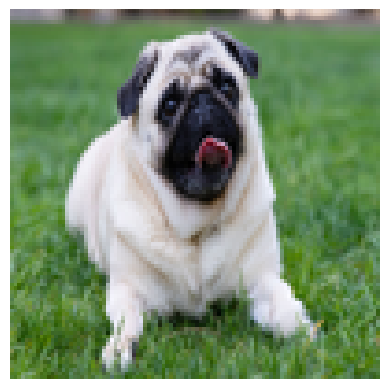

In [51]:
plt.imshow(test_image[0].astype(np.uint8))
plt.axis('off') 
plt.show()

### Save model

In [46]:
model.save('/Users/martinmurzenkov/Programming/portfolio/neural-networks/cats_vs_dogs/cats_vs_dogs.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
